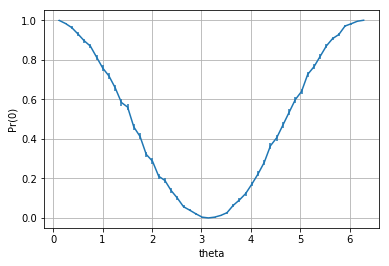

In [2]:
# example_u3.py
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
circuits = []
middle = QuantumCircuit(q, c)
meas = QuantumCircuit(q, c)
meas.barrier()
meas.measure(q, c)
exp_vector = range(0,50)
exp_theta = []
theta = 0.0
for exp_index in exp_vector:
    delta_theta = 2*np.pi/len(exp_vector)
    theta = theta + delta_theta
    exp_theta.append(theta)
    middle.u3(delta_theta,0,0,q)
    circuits.append(middle + meas)

# Execute the circuits
shots = 1024
job = execute(circuits, backend = Aer.get_backend('qasm_simulator'), shots=shots, seed_simulator=8)
result = job.result()

# Plot the result
exp_data = []
exp_error = []
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    exp_data.append(p0)
    exp_error.append(np.sqrt(p0*(1-p0)/shots))

plt.errorbar(exp_theta, exp_data, exp_error)
plt.xlabel('theta')
plt.ylabel('Pr(0)')
plt.grid(True)
plt.show()